In this notebook I will explore several questions regarding the StackOverflow Data Survey of 2018.
1) What variation in salary is explained by Formal Education?
2) What are the future ambitions of developers within 5 years?
3) What are the most common majors in undergrad?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv('./survey_results_public (2).csv')
schema = pd.read_csv('./survey_results_schema (2).csv')
df.head()

C:\Users\User\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [54]:
df['Respondent'].describe()

count     48788.000000
mean      50873.155817
std       29291.830194
min           3.000000
25%       25523.750000
50%       50919.500000
75%       76181.250000
max      101592.000000
Name: Respondent, dtype: float64

In [59]:
pd.set_option('display.max_colwidth', -1)

In [62]:
schema.describe()

,Column,QuestionText
count,129,129
unique,129,124
top,AgreeDisagree1,"Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year?"
freq,1,2


In [61]:
schema.head(10)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,Employment,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
7,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
8,CompanySize,Approximately how many people are employed by the company or organization you work for?
9,DevType,Which of the following describe you? Please select all that apply.


In [4]:
df['DevType'].unique()

array(['Full-stack developer',
       'Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Engineering manager;Full-stack developer', ...,
       'Back-end developer;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Desktop or enterprise applications developer;Front-end developer;Mobile developer;Student;System administrator',
       'Back-end developer;Designer;Embedded applications or devices developer;Front-end developer;Game or graphics developer',
       'C-suite executive (CEO, CTO, etc.);Designer;Front-end developer;Product manager'],
      dtype=object)

I will explore my first question. I think Formal Education is a predictor of Salary. However, I am interested in how much variation of salaries can be explained by Formal Education. The reason I am curious about it is because we are researching people in the tech sphere. It is known that many developers are 'self-made', i.e. without going through traditional schools. Hence my current hypothesis is that not much variation in salaries will be explained by Formal Education. But we shall see. 
To begin, I will research a bit the variables of interest, clean the data if necessary and proceed with a linear regression.

In [5]:
df['Salary'].describe()

count     50578
unique     3998
top           0
freq       1121
Name: Salary, dtype: object

In [6]:
df["Salary"].isnull().any()

True

In [7]:
df["Salary"].isnull().mean()

0.4883617419452734

In [8]:
#Drop the rows with missing salaries.
df = df.dropna(subset=['Salary'], how='any')

In [9]:
df["Salary"].isnull().any()

False

In [10]:
df['FormalEducation'].isnull().any()

True

In [11]:
df = df.dropna(subset=['FormalEducation'], how='any')

In [12]:
df['FormalEducation'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)', 'Associate degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

We can see that Formal Education is a categorical variable. If we do not treat it as such, and just put it into our model, it will not work. The linear regression is a quantitative tool, i.e. it uses numbers as inputs. Hence we must encode it, so that every category will be interpreted as either 1 or 0.

In [13]:
df['FormalEducation'] = pd.concat([df.drop(columns = ['FormalEducation'], axis=1),pd.get_dummies(df["FormalEducation"],prefix=df['FormalEducation'], prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)


In [14]:
df['Salary'].describe()

count     49838
unique     3957
top       60000
freq       1081
Name: Salary, dtype: object

In [15]:
#Convert the salary variable into floating type so the regression can run.

df['Salary'] = df["Salary"].str.replace(',', "").astype(float)

In [16]:
X = df[['FormalEducation']]
y = df['Salary']

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# Fit the model to the training data.

lm_model.fit(X_train, y_train)

# Predict outcome values using the testing data.
y_preds = lm_model.predict(X_test)

# R squared value of our model

r2_result = r2_score(y_test, y_preds)

In [17]:
r2_result

-6.688515818353835e-05

The r squared came negative, very close to zero. In the context of python, a negative r^2 score means that the model performed extremely poor. In other words, FORMAL EDUCATION is useless for predicting SALARY in the context of this dataset. This is not that surprising, given that in the tech world, people are starting in many non-tradiditional ways: online education, bootcamps, internships etc. Employers in this fiels seem to respond less to the formal education signal and pay closer attention to the candidates' skills.

In [18]:
list(df)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

I will explore now my second question:
What are the future ambitions of developers in five years? I start with researching the variable to see what possible answers the respondents had to where they hope to be in five years. 
I will analyze the data with a pie chart.

In [19]:
df['HopeFiveYears'].describe()

count                                                 48788
unique                                                    7
top       Working in a different or more specialized tec...
freq                                                  16962
Name: HopeFiveYears, dtype: object

In [20]:
df['HopeFiveYears'].unique()

array(["Working in a different or more specialized technical role than the one I'm in now",
       'Working as a founder or co-founder of my own company',
       'Doing the same work',
       'Working in a career completely unrelated to software development',
       'Working as a product manager or project manager',
       'Working as an engineering manager or other functional manager',
       nan, 'Retirement'], dtype=object)

In [21]:
df = df.dropna(subset = ['HopeFiveYears'], how='any')

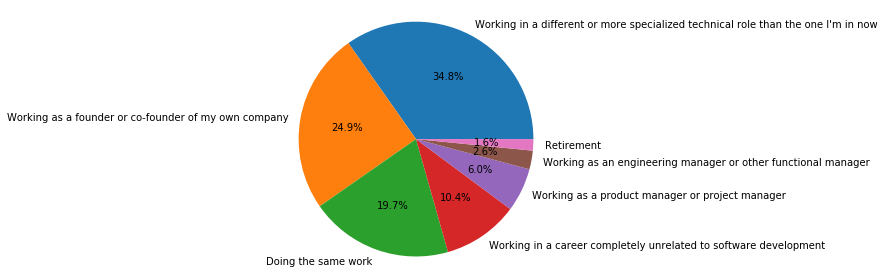

In [22]:
fig1, ax1 = plt.subplots()
ax1.pie(labels=["Working in a different or more specialized technical role than the one I'm in now",
       'Working as a founder or co-founder of my own company',
       'Doing the same work',
       'Working in a career completely unrelated to software development',
       'Working as a product manager or project manager',
       'Working as an engineering manager or other functional manager', 'Retirement'],
       x = (df['HopeFiveYears']).value_counts(), autopct='%1.1f%%')
ax1.axis('equal')
plt.tight_layout()
plt.show()

As we can see in the pie chart above, the majority of developers surveyed see themselves working in a different or more specialized technical role than currently; followed by working as a founder or cofounder of their own company.
The second finding is not surprising: founding a company. With the boom of tech startups in the last decade, people working in tech get inspired to start that 'unicorn company', hoping they can also make it. Entrepreneurship in tech has become a part of culture in this day, and this data confirms this point.

I am curious to see now what are the most common undergrad majors for tech people.

In [23]:
df['UndergradMajor'].unique()

array(['A natural science (ex. biology, chemistry, physics)',
       'Computer science, computer engineering, or software engineering',
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       nan, 'A business discipline (ex. accounting, finance, marketing)',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       'A social science (ex. anthropology, psychology, political science)',
       'Web development or web design',
       'Information systems, information technology, or system administration',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Mathematics or statistics',
       'A health science (ex. nursing, pharmacy, radiology)',
       'I never declared a major'], dtype=object)

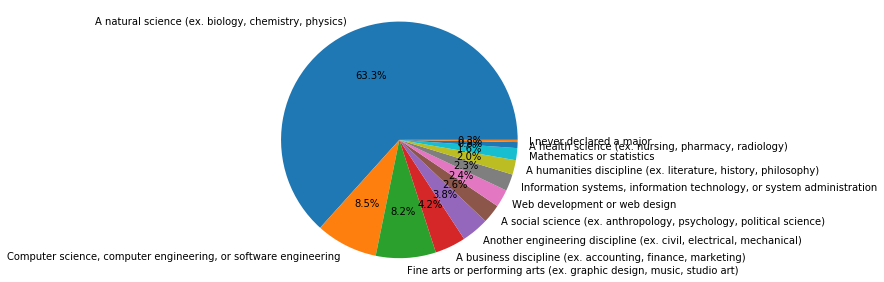

In [24]:
fig2, ax2 = plt.subplots()
ax2.pie(labels=['A natural science (ex. biology, chemistry, physics)',
       'Computer science, computer engineering, or software engineering',
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
        'A business discipline (ex. accounting, finance, marketing)',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       'A social science (ex. anthropology, psychology, political science)',
       'Web development or web design',
       'Information systems, information technology, or system administration',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Mathematics or statistics',
       'A health science (ex. nursing, pharmacy, radiology)',
       'I never declared a major'],
       x = (df['UndergradMajor']).value_counts(), autopct='%1.1f%%')

ax2.axis('equal')
plt.tight_layout()
plt.show()

To my surprise, the most majors are in natural sciences(biology, physics etc.), whereas I expected to see Computer Science as the most common major. 
Moreover, there is a similar percentage of computer science grads and fine arts grads in this dataset (8.5% and 8.2% respectively).